Observations:
1. Capomulin is the only drug that appears to be effective reducing the tumor volume, vs the other drugs that dont show significant difference vs the placebo
2. Capomulin reduces the metastic spread by roughly half as compared to the other drugs, including the placebo over a 45 day period
3. Capomulin improves the survival rate to roughly 85% over a 45 day period as opposed to the other drugs that demonstrade a result of between 35-45% over a 45 day period. Demonstrating that that over a 45 day period the other drugs do not show any benefit over a placebo

In [67]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data= "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug= pd.read_csv(mouse_drug_data)
mouse_drug.head()

clinical_trial= pd.read_csv(clinical_trial_data)
clinical_trial.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [68]:
# Combine the data into a single dataset
drug_results=pd.merge(mouse_drug, clinical_trial, on=['Mouse ID'])

# Display the data table for preview
drug_results.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [69]:
# Droping drugs that are not needed for analysis
drug_results=drug_results[drug_results["Drug"].isin(["Capomulin","Infubinol","Ketapril","Placebo"])]
drug_results.head(15)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
398,n923,Ketapril,10,48.791950,1
399,n923,Ketapril,15,51.738706,1
400,n923,Ketapril,20,52.599206,1
401,n923,Ketapril,25,56.855465,2
402,n923,Ketapril,30,59.632561,3


In [70]:
# Bringing in only the columns and data needed 
drug_results_tumor= pd.DataFrame({"Drug":drug_results["Drug"],"Timepoint":drug_results["Timepoint"],"Tumor Volume (mm3)":drug_results["Tumor Volume (mm3)"]})

In [71]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_results_dt=drug_results_tumor.groupby(["Drug","Timepoint"])
drug_results_dt.mean()

drug_results_dt_final=pd.DataFrame(drug_results_dt.mean().reset_index())
drug_results_dt_final

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error = drug_results_dt_final.groupby("Drug").sem()

standard_error = drug_results_tumor.groupby(["Drug", "Timepoint"]).sem()
standard_error

# Convert to DataFrame
standard_error_final=pd.DataFrame(standard_error.reset_index())
standard_error_final.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# reformating the DataFrame to show columns as rows and rows as columns

# Reformat the Mean DataFrame to show columns as rows and rows as columns
drug_results_pivot=drug_results_dt_final.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
drug_results_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [9]:
# Reformat the Standard Mean DataFrame to show columns as rows and rows as columns
standard_error_pivot=standard_error_final.pivot(index="Timepoint",columns="Drug", values="Tumor Volume (mm3)")
standard_error_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


In [12]:
# Generate the list of means for each drug in order to plot as indicated

#Capomulin
capomulin_avg=drug_results_pivot.loc[:,["Capomulin"]]
capomulin_avg=capomulin_avg["Capomulin"]

#Infubinol
infubinol_avg=drug_results_pivot.loc[:,["Infubinol"]]
infubinol_avg=infubinol_avg["Infubinol"]

#Ketapril
ketapril_avg=drug_results_pivot.loc[:,["Ketapril"]]
ketapril_avg=ketapril_avg["Ketapril"]

#Placebo
placebo_avg=drug_results_pivot.loc[:,["Placebo"]]
placebo_avg=placebo_avg["Placebo"]

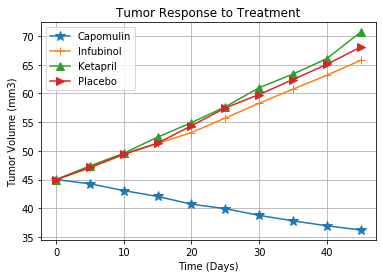

In [13]:
# Plot the Tumor response to treatement as measured by size over time
time=list(drug_results_pivot.index.values)

#plot Capomulin
plt.errorbar(time, capomulin_avg, marker="*", ms = 10, label = "Capomulin")

#plot Infubinol
plt.errorbar(time, infubinol_avg, marker="+", ms = 8, label = "Infubinol")

#plot Ketapril
plt.errorbar(time, ketapril_avg, marker="^", ms = 8, label = "Ketapril")

#plot Placebo
plt.errorbar(time, placebo_avg, marker=">", ms = 8, label = "Placebo")

# format the chart
plt.grid(True)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.title("Tumor Response to Treatment")
plt.legend(frameon=True)

#save the chart
plt.savefig("Tumor Response.png")

plt.show()



## Metastatic Response to Treatment

In [15]:
# Filter the data to only work with what is needed
metastic_results=pd.DataFrame({"Drug":drug_results["Drug"],"Timepoint":drug_results["Timepoint"],"Metastatic Sites":drug_results["Metastatic Sites"]})
#metastic_results.head()


In [16]:
#Calculate and store the mean met site data grouped by Drug and timepoint
metastic_results_grp=metastic_results.groupby(["Drug","Timepoint"])
metastic_results_grp.mean()

# Inserting the group results in a dataframe
metastic_results_final=pd.DataFrame(metastic_results_grp.mean().reset_index())
#metastic_results_final.head()

In [18]:
# calculate and store the standard error of the mean and group by Drug and Timepoint
metastic_results_sem = metastic_results.groupby(["Drug","Timepoint"])
metastic_results_sem.sem()
# inserting the group results in a dataframe
metastic_results_sem_final=pd.DataFrame(metastic_results_sem.sem().reset_index())
metastic_results_sem_final.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [20]:
# Minor Data Munging to Re-Format the Data Frames
metastic_results_final=metastic_results_final.pivot(index="Timepoint",columns="Drug",values = "Metastatic Sites")
metastic_results_final.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [21]:
# Generate the list of means for each drug in order to plot as indicated

#Capomulin
metastic_capomulin_avg=metastic_results_final.loc[:,["Capomulin"]]
metastic_capomulin_avg=metastic_capomulin_avg["Capomulin"]

#Infubinol
metastic_infubinol_avg=metastic_results_final.loc[:,["Infubinol"]]
metastic_infubinol_avg=metastic_infubinol_avg["Infubinol"]

#Ketapril
metastic_ketapril_avg=metastic_results_final.loc[:,["Ketapril"]]
metastic_ketapril_avg=metastic_ketapril_avg["Ketapril"]

#Placebo
metastic_placebo_avg=metastic_results_final.loc[:,["Placebo"]]
metastic_placebo_avg=metastic_placebo_avg["Placebo"]
metastic_placebo_avg

Timepoint
0     0.000000
5     0.375000
10    0.833333
15    1.250000
20    1.526316
25    1.941176
30    2.266667
35    2.642857
40    3.166667
45    3.272727
Name: Placebo, dtype: float64

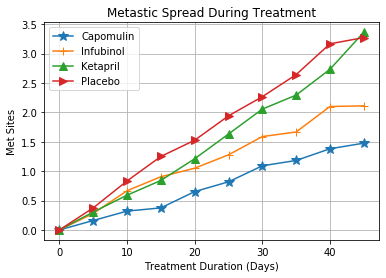

In [32]:
# Plot the Metastic Spread During Treatment as measured by time and sizes by drug
days=list(drug_results_pivot.index.values)

#plot Capomulin
plt.errorbar(days, metastic_capomulin_avg, marker="*", ms = 10, label = "Capomulin")

#plot Infubinol
plt.errorbar(days, metastic_infubinol_avg, marker="+", ms = 8, label = "Infubinol")

#plot Ketapril
plt.errorbar(days, metastic_ketapril_avg, marker="^", ms = 8, label = "Ketapril")

#plot Placebo
plt.errorbar(days, metastic_placebo_avg, marker=">", ms = 8, label = "Placebo")

# format the chart
plt.grid(True)
plt.ylabel("Met Sites")
plt.xlabel("Treatment Duration (Days)")
plt.title("Metastic Spread During Treatment")
plt.legend(frameon=True)

#save the chart
plt.savefig("Metastic Spread During Treatment.png")

plt.show()

## Survival Rates

In [25]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

In [26]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Create a DataFrame to bring only the data needed
drug_survival_rates=pd.DataFrame({"Mice":drug_results["Mouse ID"], "Drug":drug_results["Drug"],"Timepoint":drug_results["Timepoint"]})
#drug_survival_rates.head()

#Regroup the DataFrame
mice_count=drug_survival_rates.groupby(["Drug","Timepoint"])
#mice_count.head()

# Create a DataFrame and reset the index to Drug
drug_survival_count=pd.DataFrame(mice_count.count().reset_index())
#drug_survival_count.head()

#rename the mice column to Mouse Count
drug_survival_count=drug_survival_count.rename(columns={"Mice":"Mouse Count"})
drug_survival_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [27]:
# Minor Data Munging to Re-Format the Data Frames
drug_survival_count_final=drug_survival_count.pivot(index="Timepoint", columns = "Drug", values = "Mouse Count")

# Preview the Data Frame
drug_survival_count_final.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


In [28]:
# Begin to generate the data in percentages to create the plot

# Create a new DataFrame to show values as percentage
drug_survival_percentage = pd.DataFrame({"Drug" : drug_survival_count["Drug"], "Timepoint": drug_survival_count["Timepoint"], "Survival Rate %":(drug_survival_count["Mouse Count"]/25)*100})
drug_survival_percentage.head()

,Drug,Timepoint,Survival Rate %
0,Capomulin,0,100.0
1,Capomulin,5,100.0
2,Capomulin,10,100.0
3,Capomulin,15,96.0
4,Capomulin,20,92.0


In [29]:
# create a pivot so that rows are columns and columns are rows
drug_survival_percentage = drug_survival_percentage.pivot(index = "Timepoint", columns = "Drug", values = "Survival Rate %")
drug_survival_percentage.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


In [33]:
# Generate the list of percentage survival for each drug in order to plot as indicated

#Capomulin
capomulin_survival_percent = drug_survival_percentage.loc[:,["Capomulin"]]

#Infubinol
infubinol_survival_percent = drug_survival_percentage.loc[:,["Infubinol"]]

#Ketapril
ketapril_survival_percent = drug_survival_percentage.loc[:,["Ketapril"]]

#Placebo
placebo_survival_percent = drug_survival_percentage.loc[:,["Placebo"]]
#placebo_survival_percent

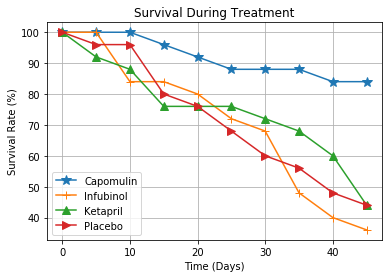

In [34]:
# Plot the survival rate during treatment as measured by survival rate and time
days = list(drug_survival_percentage.index.values)

#plot Capomulin
plt.errorbar(days, capomulin_survival_percent, marker="*", ms = 10, label = "Capomulin")

#plot Infubinol
plt.errorbar(days, infubinol_survival_percent, marker="+", ms = 8, label = "Infubinol")

#plot Ketapril
plt.errorbar(days, ketapril_survival_percent, marker="^", ms = 8, label = "Ketapril")

#plot Placebo
plt.errorbar(days, placebo_survival_percent, marker=">", ms = 8, label = "Placebo")

# format the chart
plt.grid(True)
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.title("Survival During Treatment")
plt.legend(frameon=True)

#save the chart
plt.savefig("Survival During Treatment.png")

plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [39]:
# calculate the percentage change for each drug
drug_percentage_change = drug_results_pivot.pct_change(periods=9).dropna()
drug_percentage_change = drug_percentage_change.reset_index()
print (drug_percentage_change)
indexv=drug_percentage_change.keys()

Drug  Timepoint  Capomulin  Infubinol  Ketapril  Placebo
0            45  -0.194753   0.461235  0.570288  0.51298


In [47]:
# Store all Relevant Percent Changes into a Tuple

#Capomulin
capomulin_tumor_change = round(drug_percentage_change["Capomulin"][0] * 100, 2)

#Infubinol
infubinol_tumor_change = round(drug_percentage_change["Infubinol"][0] * 100, 2)

#Ketapril
ketapril_tumor_change = round(drug_percentage_change["Ketapril"][0] * 100, 2)

#Placebo
placebo_tumor_change = round(drug_percentage_change["Placebo"][0] * 100, 2)

tumor_change=[capomulin_tumor_change, infubinol_tumor_change, ketapril_tumor_change, placebo_tumor_change]
tumor_change

[-19.48, 46.12, 57.03, 51.3]

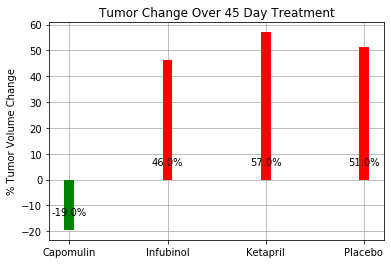

In [66]:
# create an array to store the drug names 

diffent_medicine_array = drug_percentage_change.columns.values

#delete the Timepoint column
different_medicine = np.delete(diffent_medicine_array, [0])

x_axis=np.arange(len(different_medicine))

# Splice the data between passing and failing drugs
pass_fail = 0
failing_drug = np.maximum(tumor_change, pass_fail)
passing_drug = np.minimum(tumor_change, pass_fail)

fig, ax = plt.subplots()
ax.bar(x_axis,passing_drug, 0.1, color="g", zorder=3)
ax.bar(x_axis,failing_drug, 0.1, color="r", zorder=3)
width = (10,10,10,10)
# Orient widths. Add labels, Title, tick marks, etc.

ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.grid(zorder=0)
x_axis_values=[value for value in x_axis]
plt.xticks(x_axis_values,different_medicine)


labels = [str(round(capomulin_tumor_change)) + "%", str(round(infubinol_tumor_change)) + "%", str(round(ketapril_tumor_change)) + "%", str(round(placebo_tumor_change)) + "%" ]

rects = ax.patches

for rect, label in zip(rects, labels):
    height=rect.get_height()
    width=rect.get_width()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha="center", va="bottom")

# Save the Figure
plt.savefig("Tumore Change Over 45 Day Treatment")
    
#Display the figure
plt.show()



